# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Fixing random state for reproducibility
np.random.seed(2360873)

In [6]:
renda_prev = pd.read_csv("previsao_de_renda.csv")

renda_prev.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [7]:
renda_prev_1 = renda_prev[['renda','posse_de_veiculo','posse_de_imovel']]

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/Users/joicealves/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


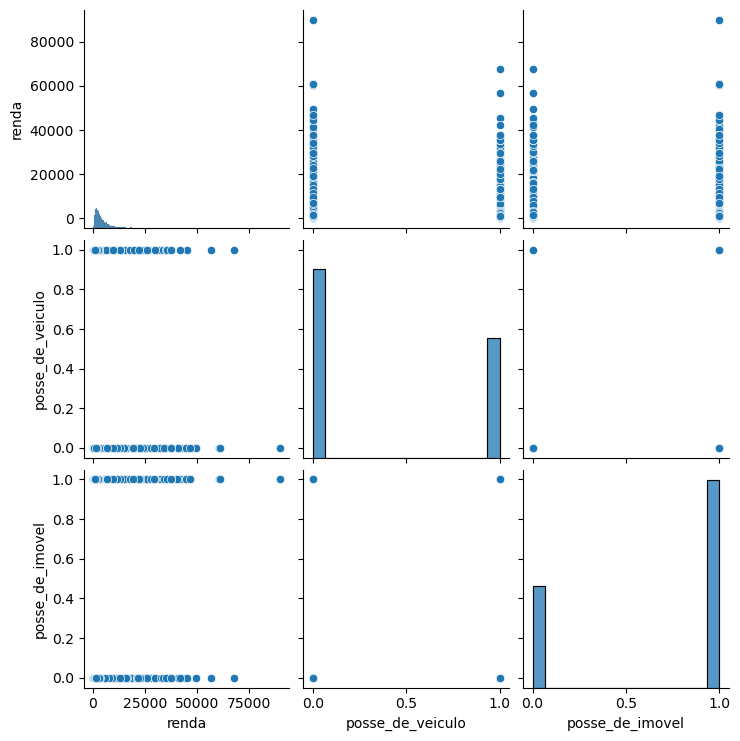

In [18]:
sns.pairplot(renda_prev_1)

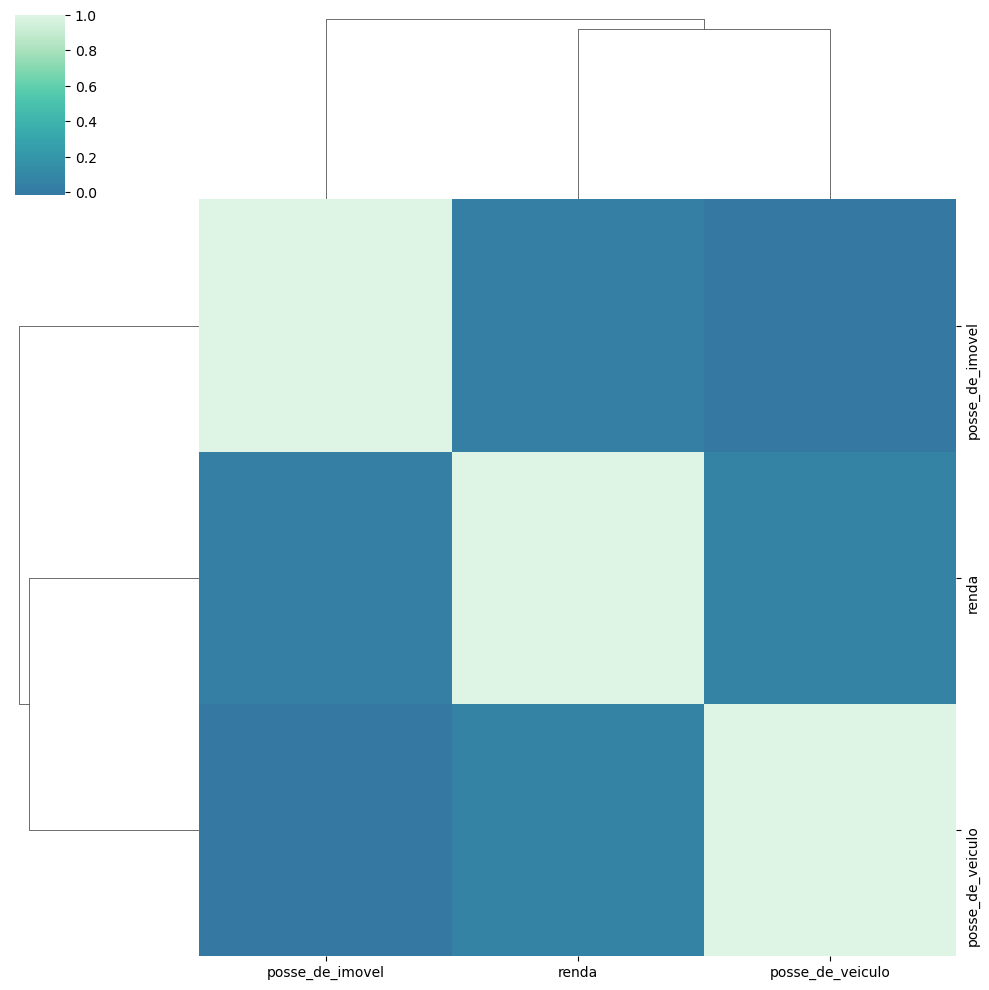

In [17]:
sns.clustermap(renda_prev_1.corr(), figsize=(10, 10), center=0, cmap="mako")

<Axes: xlabel='posse_de_imovel', ylabel='renda'>

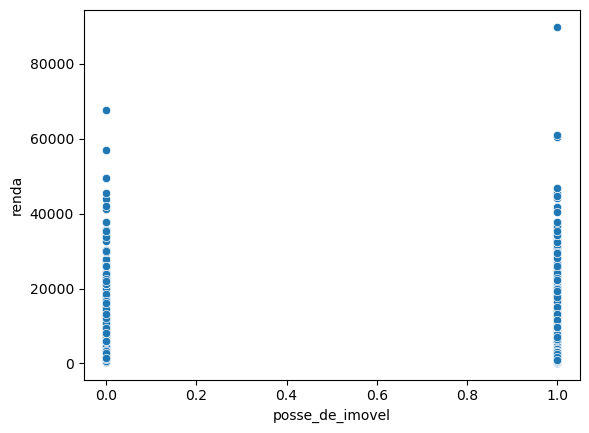

In [19]:
sns.scatterplot(data = renda_prev_1, x ="posse_de_imovel", y = "renda")

<Axes: xlabel='posse_de_veiculo', ylabel='renda'>

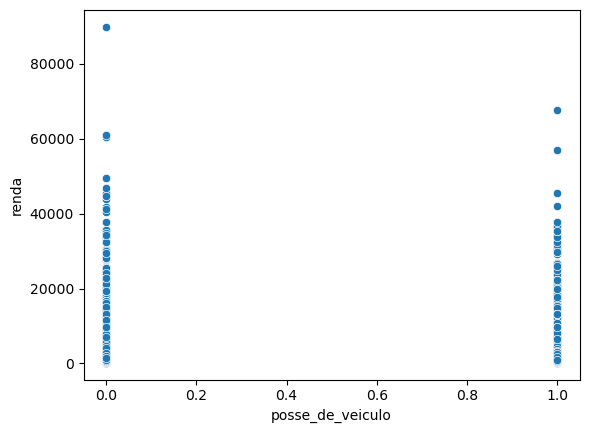

In [20]:
sns.scatterplot(data = renda_prev_1, x ="posse_de_veiculo", y = "renda")

/var/folders/z2/zc4h5d491c53jbts0kckp8s00000gn/T/ipykernel_71715/4009231125.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.pointplot(x="posse_de_imovel", y="renda",
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


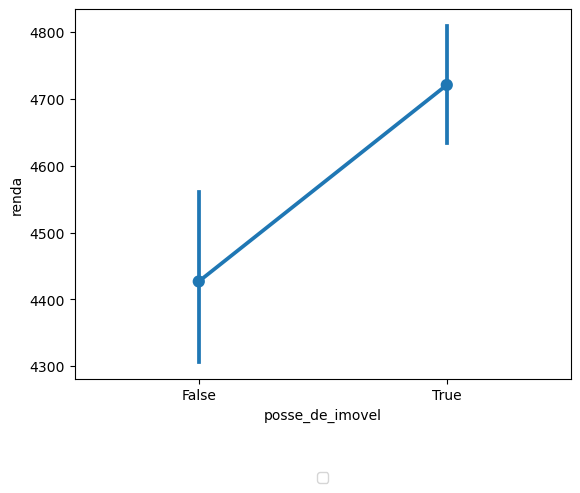

In [21]:
ax = sns.pointplot(x="posse_de_imovel", y="renda",
                   data=renda_prev_1, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

/var/folders/z2/zc4h5d491c53jbts0kckp8s00000gn/T/ipykernel_71715/2266460145.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  bx = sns.pointplot(x="posse_de_veiculo", y="renda",
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


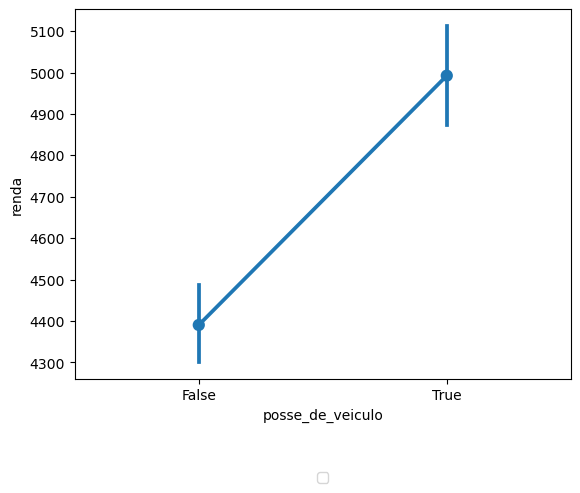

In [22]:
bx = sns.pointplot(x="posse_de_veiculo", y="renda",
                   data=renda_prev_1, dodge=True, ci = 95)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.30),ncol = 3)

Como os valores são True/False pras variáveis posse_de_imovel e posse_de_veiculo pensei em começar com uma matriz de correlação, pelo tom de azul, parece que a correlação fica em torno dos 0.2 ou 0.3, portanto é baixa.

No pairplot, deu pra ver que pra alguns dados têm uma relação bem direta, tendendo a 1, e pra outros tende a zero. No total, isso corrobora que as variáveis são pouco explicativas nesse caso.

Nas médias o resultado foi bem dieferente: podemos ver nos dois gráficos que a média de renda é maior não só na amostra, mas também para a população, para que possui imóvel e veículo. A diferenrença é mais significativa para quem possui veículo.